<a href="https://colab.research.google.com/github/stakunlena/ich_python_for_DA_HW/blob/main/Stakun_HW_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Домашняя работа №23**

1) Подгоните полином к набору точек данных
x = np.linspace(-10, 10, N)
y = 3 * x**3 + 2 * x**2 + x + np.random.normal(0, 100, N)
и постройте график результатов. Используйте функцию np.polyfit.
2) Создайте возрастные группы и рассчитайте коэффициент выживаемости для каждой комбинации возрастной группы и класса в наборе данных Titanic.

1. Подгонка полинома к набору точек данных

Коэффициенты полинома: [2.9215518  1.81512711 6.03358884 1.91768486]


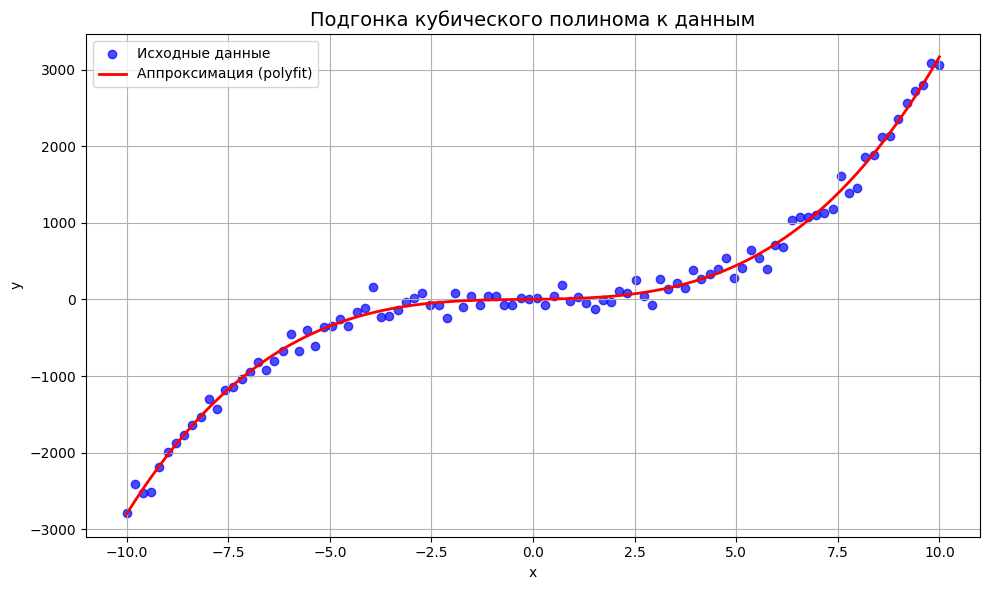

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Генерация данных
N = 100
x = np.linspace(-10, 10, N)
y = 3 * x**3 + 2 * x**2 + x + np.random.normal(0, 100, N)  # добавляем шум

# 2. Подгонка полинома (степень 3, т.к. данные кубические)
coeffs = np.polyfit(x, y, 3)
p = np.poly1d(coeffs)

print("Коэффициенты полинома:", coeffs)

# 3. Предсказанные значения
y_fit = p(x)

# 4. Визуализация
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color="blue", label="Исходные данные", alpha=0.7)
plt.plot(x, y_fit, color="red", linewidth=2, label="Аппроксимация (polyfit)")
plt.title("Подгонка кубического полинома к данным", fontsize=14)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

2. Коэффициент выживаемости возрастных групп

      age_group  pclass  survival_rate
0         child       1       0.750000
1         child       2       1.000000
2         child       3       0.404255
3          teen       1       1.000000
4          teen       2       0.666667
5          teen       3       0.322581
6   young_adult       1       0.697674
7   young_adult       2       0.415385
8   young_adult       3       0.233129
9         adult       1       0.701149
10        adult       2       0.439394
11        adult       3       0.165049
12       senior       1       0.441860
13       senior       2       0.315789
14       senior       3       0.090909


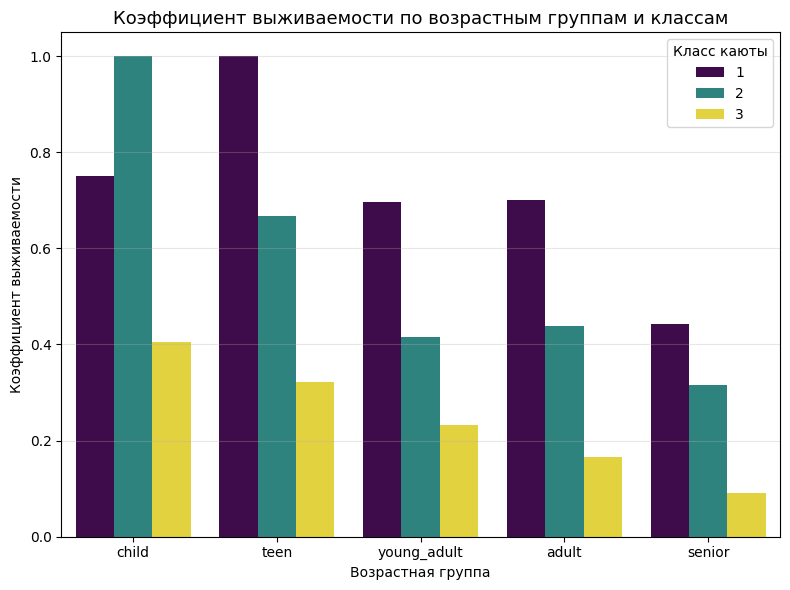

In [9]:
import pandas as pd
import seaborn as sns

# 1. Загрузка данных Titanic
titanic = sns.load_dataset("titanic")
titanic.head()

# 2. Проверим и очистим данные
titanic = titanic[["age", "pclass", "survived"]].dropna()

# 3. Создание возрастных групп
bins = [0, 12, 18, 30, 50, 80]
labels = ["child", "teen", "young_adult", "adult", "senior"]
titanic["age_group"] = pd.cut(titanic["age"], bins=bins, labels=labels, right=False)

# 4. Расчёт коэффициента выживаемости
survival_rates = titanic.groupby(["age_group", "pclass"], observed=True)["survived"].mean().reset_index()
survival_rates.rename(columns={"survived": "survival_rate"}, inplace=True)

print(survival_rates)

# 5. Визуализация
plt.figure(figsize=(8, 6))
sns.barplot(data=survival_rates, x="age_group", y="survival_rate", hue="pclass", palette="viridis")
plt.title("Коэффициент выживаемости по возрастным группам и классам", fontsize=13)
plt.xlabel("Возрастная группа")
plt.ylabel("Коэффициент выживаемости")
plt.legend(title="Класс каюты")
plt.grid(True, axis="y", alpha=0.3)
plt.tight_layout()
plt.show()